In [30]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

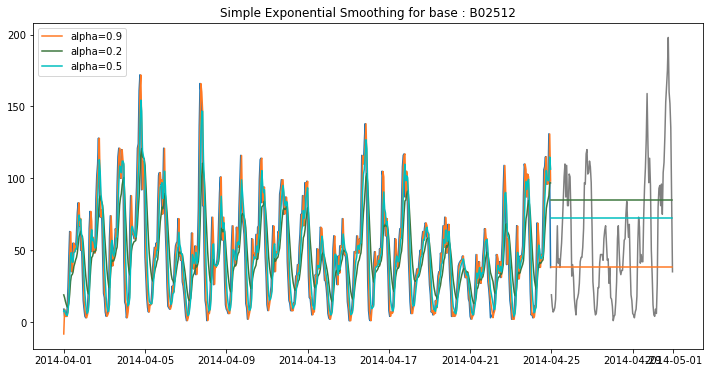

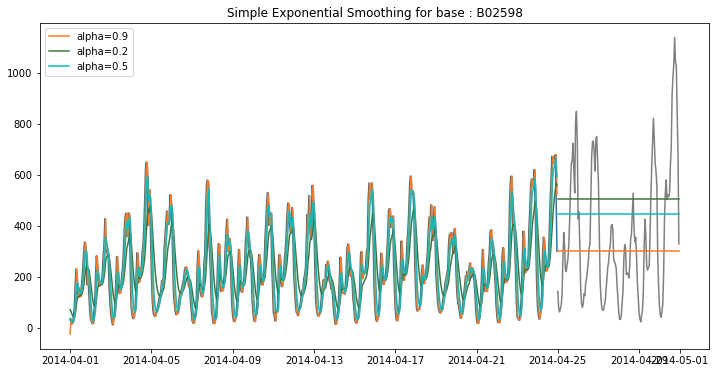

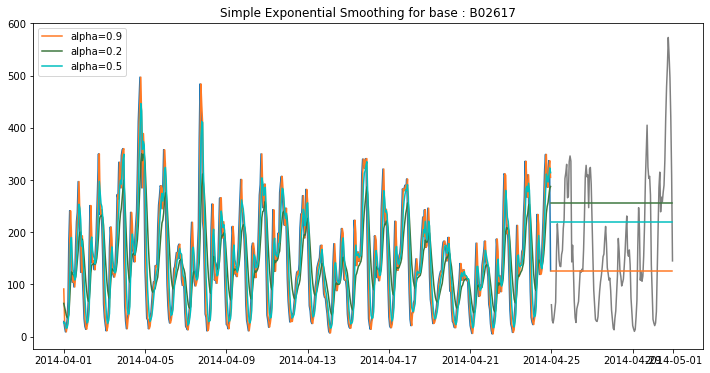

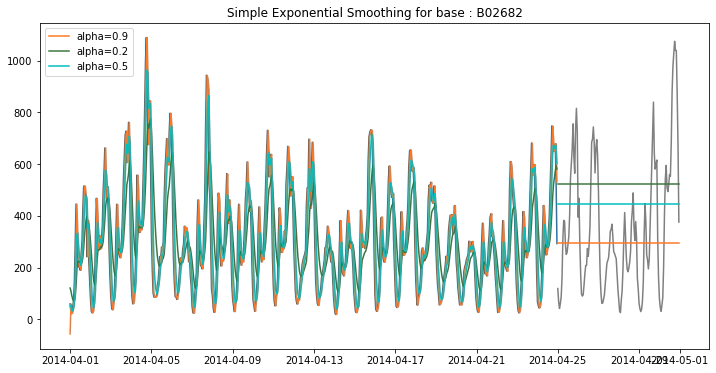

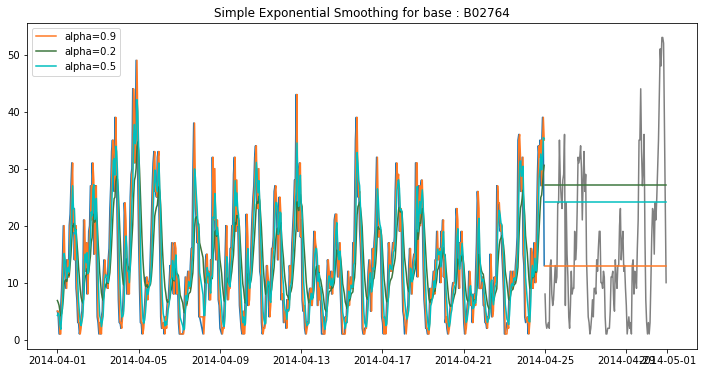

In [31]:
uber_apr14 = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')

uber_apr14['Date/Time'] = pd.to_datetime(uber_apr14['Date/Time'])

df_by_base = uber_apr14.groupby([pd.Grouper(key='Date/Time',freq='H'),uber_apr14.Base]).size().reset_index(name='count')

def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df_b02512 = df_by_base[df_by_base['Base']=='B02512'].drop(axis=0, columns='Base')
df_b02598 = df_by_base[df_by_base['Base']=='B02598'].drop(axis=0, columns='Base')
df_b02617 = df_by_base[df_by_base['Base']=='B02617'].drop(axis=0, columns='Base')
df_b02682 = df_by_base[df_by_base['Base']=='B02682'].drop(axis=0, columns='Base')
df_b02764 = df_by_base[df_by_base['Base']=='B02764'].drop(axis=0, columns='Base')

for df, base in zip([df_b02512, df_b02598, df_b02617, df_b02682, df_b02764],['B02512', 'B02598', 'B02617', 'B02682', 'B02764']):
    
    df_for_graph = df.reset_index(drop=True)

    train_size = int(len(df_for_graph) * 0.8)
    test_size = len(df_for_graph) - train_size
    train, test = df_for_graph[0:train_size], df_for_graph[train_size:len(df)]
    
    train.index = pd.to_datetime(train['Date/Time'])
    test.index = pd.to_datetime(test['Date/Time'])
    pred = test.copy()

    model = SimpleExpSmoothing(np.asarray(train['count']), initialization_method="estimated")
    model._index = pd.to_datetime(train['Date/Time'])

    fit1 = model.fit()
    pred1 = fit1.forecast(test_size-1)
    fit2 = model.fit(smoothing_level=.2)
    pred2 = fit2.forecast(test_size-1)
    fit3 = model.fit(smoothing_level=.5)
    pred3 = fit3.forecast(test_size-1)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(train['Date/Time'], train['count'])
    ax.plot(test['Date/Time'], test['count'], color="gray")

    for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):

        ax.plot(train.index, f.fittedvalues, color=c)
        ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)

    plt.title("Simple Exponential Smoothing for base : " + base )    
    plt.legend()

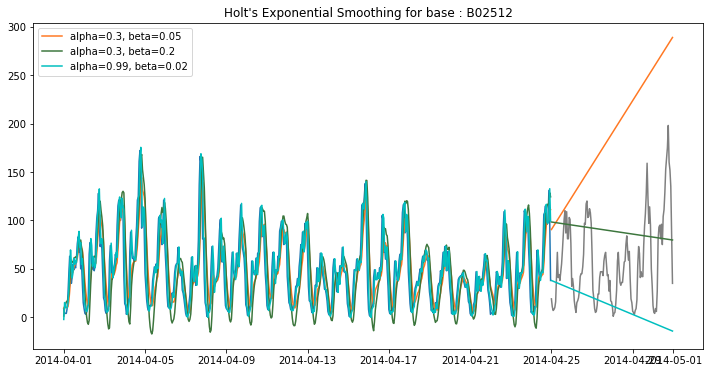

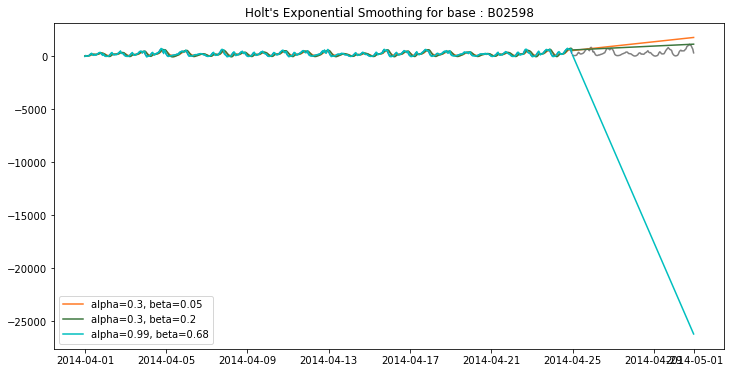

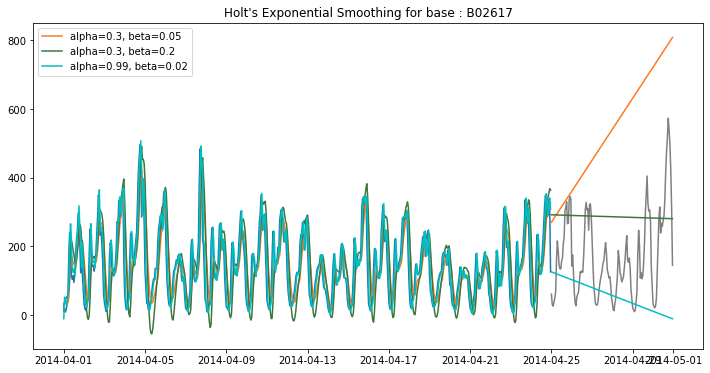

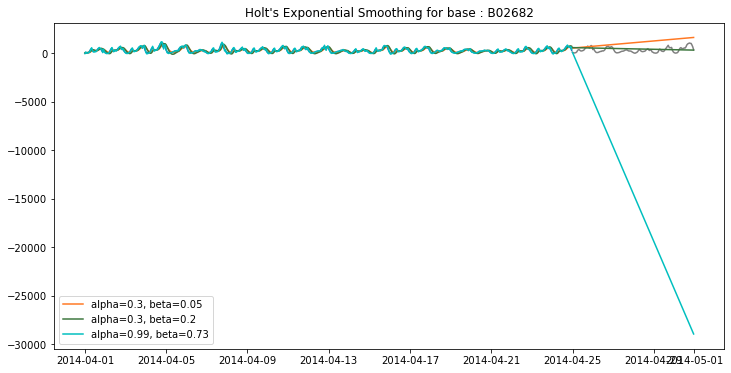

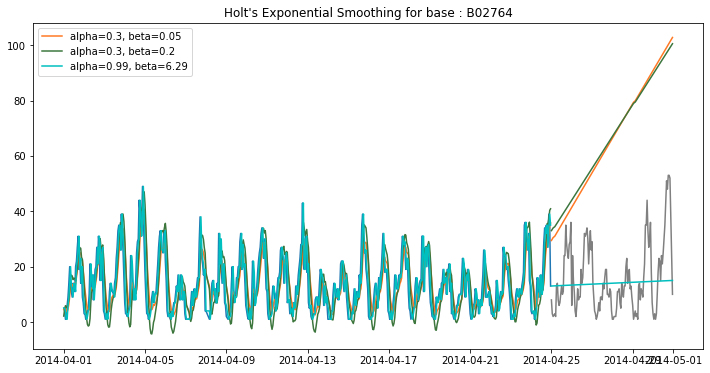

In [29]:
uber_apr14 = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')

uber_apr14['Date/Time'] = pd.to_datetime(uber_apr14['Date/Time'])

df_by_base = uber_apr14.groupby([pd.Grouper(key='Date/Time',freq='H'),uber_apr14.Base]).size().reset_index(name='count')

def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df_b02512 = df_by_base[df_by_base['Base']=='B02512'].drop(axis=0, columns='Base')
df_b02598 = df_by_base[df_by_base['Base']=='B02598'].drop(axis=0, columns='Base')
df_b02617 = df_by_base[df_by_base['Base']=='B02617'].drop(axis=0, columns='Base')
df_b02682 = df_by_base[df_by_base['Base']=='B02682'].drop(axis=0, columns='Base')
df_b02764 = df_by_base[df_by_base['Base']=='B02764'].drop(axis=0, columns='Base')

for df, base in zip([df_b02512, df_b02598, df_b02617, df_b02682, df_b02764],['B02512', 'B02598', 'B02617', 'B02682', 'B02764']):
    
    df_for_graph = df.reset_index(drop=True)

    train_size = int(len(df_for_graph) * 0.8)
    test_size = len(df_for_graph) - train_size
    train, test = df_for_graph[0:train_size], df_for_graph[train_size:len(df)]
    
    train.index = pd.to_datetime(train['Date/Time'])
    test.index = pd.to_datetime(test['Date/Time'])
    pred = test.copy()

    model = Holt(np.asarray(train['count']), initialization_method="estimated")
    model._index = pd.to_datetime(train['Date/Time'])

    fit1 = model.fit(smoothing_level=.3, smoothing_trend=.05)
    pred1 = fit1.forecast(test_size-1)
    fit2 = model.fit(smoothing_level=.3, smoothing_trend=.2)
    pred2 = fit2.forecast(test_size-1)
    fit3 = model.fit(optimized=True)
    pred3 = fit3.forecast(test_size-1)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(train['Date/Time'], train['count'])
    ax.plot(test['Date/Time'], test['count'], color="gray")

    for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):

        ax.plot(train.index, f.fittedvalues, color=c)
        ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)

    plt.title("Holt's Exponential Smoothing for base : " + base )    
    plt.legend()